# Ensemble Learning

In [1]:
# pre-requisites
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data
df = pd.read_csv('Social_Network_Ads.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
df.drop('User ID',axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

df['Gender']= LabelEncoder().fit_transform(df['Gender'])

In [8]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


#### split the data

In [9]:
# create x
x = df.drop(['Gender','Purchased'],axis=1)

# create y
y = df['Purchased']

In [30]:

from sklearn.model_selection import train_test_split

#split the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123456)

In [32]:
from sklearn.ensemble import RandomForestClassifier 

# create the model
model_random = RandomForestClassifier(n_estimators=100)

# train the model
model_random.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## build Decision Tree

In [33]:
# model building

from sklearn.tree import DecisionTreeClassifier

# create a model
model_decision = DecisionTreeClassifier()

# train the model
model_decision.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
from sklearn.tree import DecisionTreeClassifier 

model_tree = DecisionTreeClassifier()

model_tree.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Evaluate Random Forest

In [34]:
y_pred = model_random.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"accuracy = {accuracy:.2f}")
print(f"precision = {precision:.2f}")
print(f"recall = {recall:.2f}")
print(f"f1 = {f1:.2f}")

accuracy = 0.91
precision = 0.87
recall = 0.83
f1 = 0.85


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        56
           1       0.86      0.79      0.83        24

    accuracy                           0.90        80
   macro avg       0.89      0.87      0.88        80
weighted avg       0.90      0.90      0.90        80



In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.87      0.83      0.85        24

    accuracy                           0.91        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.91      0.91      0.91        80



#### Evaluate Decision Tree

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model_decision.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"accuracy = {accuracy:.2f}")
print(f"precision = {precision:.2f}")
print(f"recall = {recall:.2f}")
print(f"f1 = {f1:.2f}")

accuracy = 0.82
precision = 0.73
recall = 0.67
f1 = 0.70


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        56
           1       0.73      0.67      0.70        24

    accuracy                           0.82        80
   macro avg       0.79      0.78      0.79        80
weighted avg       0.82      0.82      0.82        80



### Data Visualization

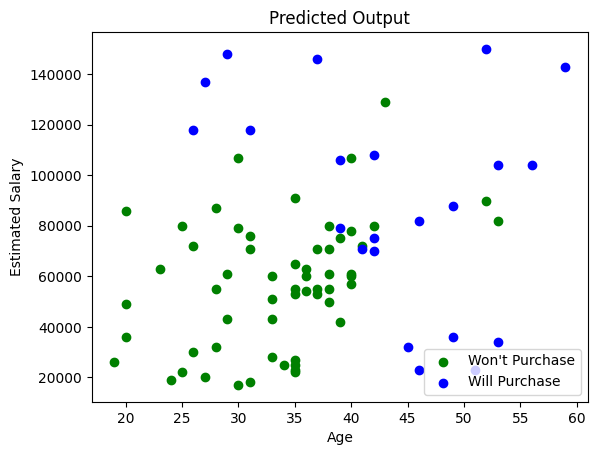

In [41]:
plt.scatter(x_test['Age'][y_pred==0],x_test['EstimatedSalary'][y_pred==0],color="green",label ="Won't Purchase")
plt.scatter(x_test['Age'][y_pred==1],x_test['EstimatedSalary'][y_pred==1],color="blue",label ="Will Purchase")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Predicted Output")
plt.legend()

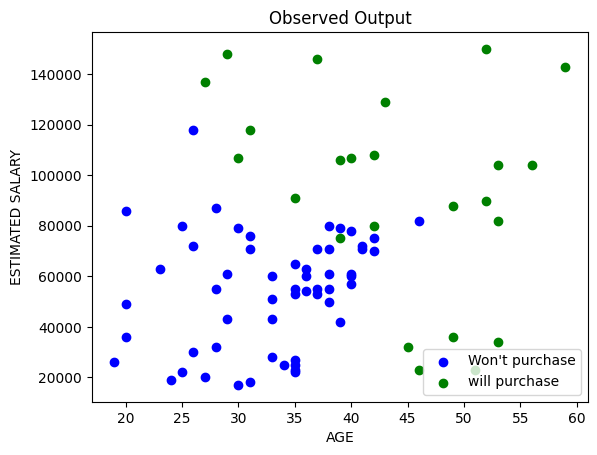

In [44]:
plt.scatter(x_test['Age'][y_test==0],x_test['EstimatedSalary'][y_test==0],color='blue',label="Won't purchase")
plt.scatter(x_test['Age'][y_test==1],x_test['EstimatedSalary'][y_test==1],color='green',label="will purchase")
plt.xlabel("AGE")
plt.ylabel("ESTIMATED SALARY")
plt.title("Observed Output")
plt.legend()